# Modelo de regresión lineal múltiple con errores normales

Sea $n\in \mathbb{N}$, $\pmb{X}$ matriz de constantes $n\times(k+1)$ dimensional con rango $k+1<n$, $\pmb{\beta}=(\beta_0,\beta_1, \ldots , \beta_k)'\in \mathbb{R}^{k+1}$ y $\sigma^2\in \mathbb{R}$. Consideramos el modelo

\begin{equation*}
\pmb{y}\sim N_n(\pmb{X}\pmb{\beta},\sigma^2\pmb{I}),
\end{equation*}
equivalentemente
\begin{equation*}
\pmb{y}=\pmb{X}\pmb{\beta} +\pmb{\epsilon}
\end{equation*}
con 
\begin{equation*}
\pmb{\epsilon}\sim N_n(\pmb{0},\sigma^2\pmb{I}),
\end{equation*}

En clase vimos que los estimadores máximo verosimil para $\pmb{\theta}=(\pmb{\beta},\sigma^2)$ son $\hat{\pmb{\theta}}=(\hat{\pmb{\beta}},\hat{\sigma}^2)$ con

\begin{align*}
\hat{\pmb{\beta}} & = (\pmb{X}'\pmb{X})^{-1}\pmb{X}'\pmb{y}
\\
\hat{\sigma}^2 & = \frac{1}{n}(\pmb{y}-\pmb{X}\hat{\pmb{\beta}})'(\pmb{y}-\pmb{X}\hat{\pmb{\beta}})
\end{align*}

Por ejemplo, consideramos
\begin{equation*}
\pmb{X}=\left( \begin{matrix} 1 & x_1 & x_1^2 & x_1^3 & x_1^4 \\ 1 & x_2 & x_2^2 & x_2^3 & x_2^4 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 & x_n^3 & x_n^4 
\\ \end{matrix}\right)
\end{equation*}
y
\begin{equation*}
\pmb{\beta}=\left( \begin{matrix} 1.1 \\ -2.5 \\ 11 \\ -18 \\ 10 \end{matrix} \right)
\end{equation*}

In [37]:
using Distributions # Paquete con distribuciones de probabilidad
n = 100 # Consideramos 100 observaciones
β = [ 1.1, -2.5, 11.0, -18.0, 10.0] # Vector β
x = rand(Uniform(),n) # n puntos aleatorios uniformes en (0,1), esta sería la primer columna de la matriz X arriba
X = zeros(n,5) # Matriz de ceros para construir X
for i in 1:n 
    X[i,:] = [ 1, x[i], x[i]^2, x[i]^3, x[i]^4 ] # iteramos para construir renglones de X
end
X

100×5 Array{Float64,2}:
 1.0  0.227922   0.0519485   0.0118402    0.00269865
 1.0  0.30956    0.0958271   0.0296642    0.00918284
 1.0  0.225516   0.0508576   0.0114692    0.0025865 
 1.0  0.886644   0.786138    0.697025     0.618013  
 1.0  0.778182   0.605567    0.471241     0.366711  
 1.0  0.426053   0.181521    0.0773377    0.0329499 
 1.0  0.583341   0.340287    0.198503     0.115795  
 1.0  0.659724   0.435236    0.287135     0.18943   
 1.0  0.380665   0.144906    0.0551606    0.0209977 
 1.0  0.594962   0.35398     0.210605     0.125302  
 1.0  0.349628   0.12224     0.0427385    0.0149426 
 1.0  0.505719   0.255752    0.129339     0.0654091 
 1.0  0.972006   0.944795    0.918346     0.892638  
 ⋮                                                  
 1.0  0.991558   0.983188    0.974888     0.966659  
 1.0  0.690162   0.476324    0.328741     0.226884  
 1.0  0.32656    0.106642    0.0348249    0.0113724 
 1.0  0.751791   0.565189    0.424904     0.319439  
 1.0  0.350597   0.122

In [96]:
ϵ = rand(Normal(0,0.1),n) # Vector de errores normales con media μ=0 y varianza σ²=0.01
y = X * β + ϵ # Observaciones provenientes del modelo
β_ml = ( X' * X)^(-1) * X' * y

5-element Array{Float64,1}:
   1.0898645640853926
  -2.8912743010206263
  13.42194188010329  
 -21.91967831332623  
  11.930753247549966 

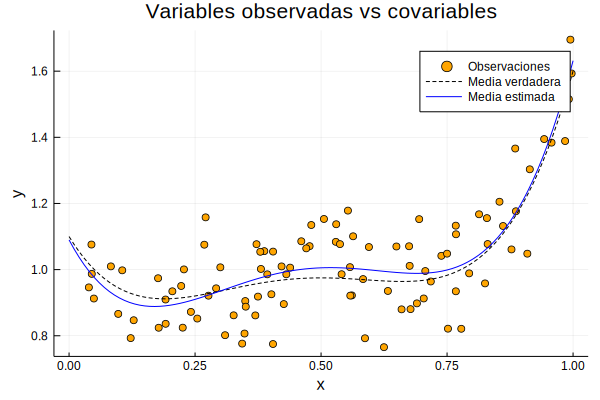

In [126]:
using Plots # Paquete para producir imágenes
f(x) = β[1] + β[2]*x + β[3]*x^2 + β[4]*x^3 + β[5]*x^4 # Media polinomial verdadera
f_ml(x) = β_ml[1] + β_ml[2]*x + β_ml[3]*x^2 + β_ml[4]*x^3 + β_ml[5]*x^4 # Media polinomial dada por máxima verosimilitud
mesh = collect(0.0:1.0/100.0:1.0)
scatter(x,y,color="orange",label="Observaciones")
plot!(mesh,f.(mesh), color = :black, linestyle=:dash ,label="Media verdadera")
plot!(mesh,f_ml.(mesh), color = :blue, label="Media estimada")
ylabel!("y")
xlabel!("x")
title!("Variables observadas vs covariables")

**Teorema** Sean $\hat{\pmb{\beta}},\hat{\sigma}^2$ los estimadores máximo verosimil en el modelo de regresión lineal múltiple con errores normales, entonces

i) $\hat{\pmb{\beta}}\sim N_{k+1}(\pmb{\beta},\sigma^2(\pmb{X}'\pmb{X})^{-1})$.

ii) $\frac{n\hat{\sigma}^2}{\sigma^2}\sim \chi^2(n-k-1)$.

iii) $\hat{\pmb{\beta}}$ y $\hat{\sigma}^2$ son independientes.

**dem.**

i) $\hat{\pmb{\beta}}=\pmb{A}\pmb{y}$ con $\pmb{A}=(\pmb{X}'\pmb{X})^{-1}\pmb{X}'$, entonces, por teorema anteriormente visto en clase, $\hat{\pmb{\beta}}\sim N_{k+1}(\pmb{A}\esp{y},\pmb{A}\,\text{cov}(y)\pmb{A}')$. $\pmb{A}\esp{\pmb{y}}=\pmb{A}X\pmb{\beta}=\pmb{\beta}$ por otro lado $\pmb{A}\,\text{cov}(y)\pmb{A}'=\sigma^2\pmb{A}\pmb{A}'= \sigma^2(\pmb{X}'\pmb{X})^{-1}$ entonces $\hat{\pmb{\beta}}\sim N_{k+1}(\pmb{\beta},\sigma^2(\pmb{X}'\pmb{X})^{-1})$.

ii) Sabemos que si $\pmb{y}\sim N_p(\pmb{\mu},\pmb{\Sigma})$ entonces $\pmb{y}'\pmb{A}\pmb{y}\sim \chi^2\left( r,\frac{\pmb{\mu}'\pmb{A}\pmb{\mu}}{2\sigma^2} \right)$ si sólo si $\pmb{A}$ es idempotente de rango $r$. Tenemos que $n\hat{\sigma}^2= \pmb{y}'\left( \pmb{I} - \pmb{X}(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\right)\pmb{y}$; al ser $\left(\pmb{X}(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\right)^2$ idempotente se sigue que $\left( \pmb{I} - \pmb{X}(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\right)$ es idempotente, de lo cual también se tiene que $\text{rango}\left( \pmb{I} - \pmb{X}(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\right)=\text{tr}\left( \pmb{I} - \pmb{X}(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\right)=n-\text{tr}\left( (\pmb{X}'\pmb{X})^{-1}\pmb{X}'\pmb{X}\right)=n-(k+1)$. Esto concluye ii).

iii) Sabemos que si $\pmb{y}\sim N_p(\pmb{\mu},\pmb{\Sigma})$ entonces $\pmb{y}'\pmb{A}\pmb{y}$ es independiente de $\pmb{B}\pmb{y}$ si sólo si $\pmb{B}\pmb{\Sigma}\pmb{A}=\pmb{0}$. Tenemos que $\hat{\pmb{\beta}}=\pmb{B}\pmb{y}$ con $\pmb{B}=(\pmb{X}'\pmb{X})^{-1}\pmb{X}'$ y $n\hat{\sigma}^2= \pmb{y}'\left( \pmb{I} - \pmb{X}(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\right)\pmb{y}$, por lo que basta ver que 
$\pmb{B}\pmb{A}=(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\left( \pmb{I} - \pmb{X}(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\right)=
(\pmb{X}'\pmb{X})^{-1}\pmb{X}' - (\pmb{X}'\pmb{X})^{-1}\pmb{X}' =\pmb{0}.
$

## Coeficiente de determinación 

Recordemos que 

$SST=\sum_{i=1}^n (y_i-\bar{y})^2=(\pmb{y}-\bar{y}\pmb{j})'(\pmb{y}-\bar{y}\pmb{j})
=\sum_{i=1}^n y_i^2 - n\bar{y}^2= \pmb{y}'\pmb{y} - n\bar{y}^2
$

(desarrollando el cuadrado)

$SSE=\sum_{i=1}^n (y_i-\hat{y}_i)^2= (\pmb{y}-\hat{\pmb{y}})'(\pmb{y}-\hat{\pmb{y}})
= \pmb{y}'\pmb{y}- \hat{\pmb{\beta}}'\pmb{X}'\pmb{X}\hat{\pmb{\beta} }=\pmb{y}'\pmb{y}- \hat{\pmb{\beta}}'\pmb{X}'y
$

(usando las ecuaciones normales)

$SSR=\sum_{i=1}^n (\hat{y}_i-\bar{y})^2=(\hat{ \pmb{y} }-\bar{y}\pmb{j})'(\hat{ \pmb{y} }-\bar{y}\pmb{j})$

son tales que 

$SST=SSE+SSR$

por lo que 

$SSR = \hat{\pmb{\beta}}'\pmb{X}'y - n\bar{y}^2$

El coeficiente de determinación $R^2$ se define por
\begin{align*}
R^2 = \frac{SSR}{SST}
= \frac{\hat{\pmb{\beta}}'\pmb{X}'y - n\bar{y}^2 }{ \pmb{y}'\pmb{y} - n\bar{y}^2 }
\end{align*}

Habíamos visto que $SSR$ puede ser expresado en términos de la matrix centradora
\begin{equation*}
\pmb{X}_c = \left( \begin{matrix} x_{1,1} & x_{1,2} & \cdots & x_{1,k}  \\ x_{2,1} & x_{2,2} & \cdots & x_{2,k} \\
\vdots & \vdots & \vdots & \vdots \\  x_{n,1} & x_{n,2} & \cdots & x_{n,k} 
\\ \end{matrix}\right)
\end{equation*}
como $SSR=\hat{\pmb{\beta}}'_1\pmb{X}_c'\pmb{y}$. Vimos que $\pmb{X}_c$ y $\hat{\pmb{\beta}}_1$ satisfacen las ecuaciones normales $\pmb{X}_c'\pmb{y}=\pmb{X}_c'\pmb{X}_c \hat{\pmb{\beta}}_1$ por lo que

\begin{equation*}
SSR=\hat{\pmb{\beta}}'_1\pmb{X}_c'\pmb{y}=\hat{\pmb{\beta}}'_1\pmb{X}_c'\pmb{X}_c \hat{\pmb{\beta}}_1
\end{equation*}

Se sigue que el coeficiente de determinación puede ser escrito en términos de la matriz centradora que es computacionalmente más estable
\begin{align*}
R^2 = \frac{SSR}{SST}
= \frac{ \hat{\pmb{\beta}}'_1\pmb{X}_c'\pmb{X}_c \hat{\pmb{\beta}}_1 }{ \pmb{y}'\pmb{y} - n\bar{y}^2 }
\end{align*}

$R^2$ mide heuristicamente el porcentaje de varianza justificada por el modelo de regresión. Visualizemos esto calculando el coeficiente de determinación en el ejemplo anterior con varianza $\sigma^2\in\{0.1,0.05 \}$ además de en un modelo donde los covariables no tienen efecto en $\pmb{y}$, es decir $ \beta_1=\beta_2=\ldots = \beta_k=0$.

In [118]:
ϵ_var0pt1 = rand(Normal(0,0.1),n) # Vector de errores normales con media μ=0 y varianza σ²=0.1
ϵ_var0pt01 = rand(Normal(0,0.01),n) # Vector de errores normales con media μ=0 y varianza σ²=0.01
ϵ_var0pt055 = rand(Normal(0,0.055),n) # Vector de errores normales con media μ=0 y varianza σ²=0.055
y_r_var0pt1 = X * β + ϵ_var0pt1 # Observaciones provenientes del modelo con varianza 0.1
y_r_var0pt01 = X * β + ϵ_var0pt01 # Observaciones provenientes del modelo con varianza 0.01
y_no_r_var0pt055 = 0.5*(mean(y_r_var0pt1)+mean(y_r_var0pt01)) .+ ϵ_var0pt055
β_ml_var0pt1 = ( X' * X)^(-1) * X' * y_r_var0pt1
β_ml_var0pt01 = ( X' * X)^(-1) * X' * y_r_var0pt01
β_ml_no_r_var0pt055 = ( X' * X)^(-1) * X' * y_no_r_var0pt055
X_c = zeros(n,4) # Matriz de ceros para construir X_c
for i in 1:n 
    X_c[i,:] = [ x[i]-mean(x), x[i]^2-mean(x.^2), x[i]^3-mean(x.^3), x[i]^4-mean(x.^4) ] # iteramos para construir renglones de X
end
R²_var0pt1 = ( β_ml_var0pt1[2:end]' * X_c' * X_c * β_ml_var0pt1[2:end] )/( y_r_var0pt1' * y_r_var0pt1 - n*mean(y_r_var0pt1)^2 )
R²_var0pt01 = ( β_ml_var0pt01[2:end]' * X_c' * X_c * β_ml_var0pt01[2:end] )/( y_r_var0pt01' * y_r_var0pt01- n*mean(y_r_var0pt01)^2 )
R²_no_r_var0pt055 = ( β_ml_no_r_var0pt055[2:end]' * X_c' * X_c * β_ml_no_r_var0pt055[2:end] )/( y_no_r_var0pt055' * y_no_r_var0pt055 - n*mean(y_no_r_var0pt055)^2 );

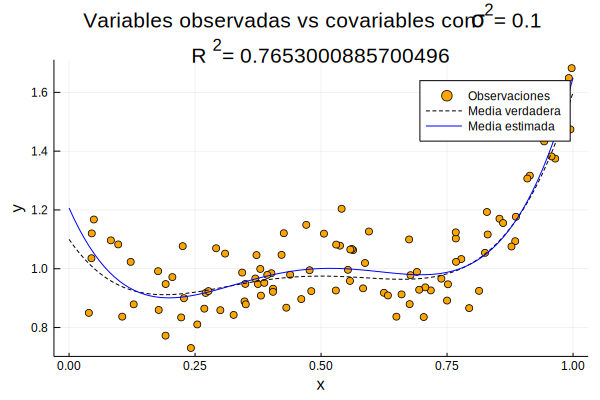

In [115]:
using LaTeXStrings # Paquete para usar latex en strings
f_ml_var0pt1(x) = β_ml_var0pt1[1] + β_ml_var0pt1[2]*x + β_ml_var0pt1[3]*x^2 + β_ml_var0pt1[4]*x^3 + β_ml_var0pt1[5]*x^4 # Media polinomial dada por máxima verosimilitud
mesh = collect(0.0:1.0/100.0:1.0)
scatter(x,y_r_var0pt1,color="orange",label="Observaciones")
plot!(mesh,f.(mesh), color = :black, linestyle=:dash ,label="Media verdadera")
plot!(mesh,f_ml_var0pt1.(mesh), color = :blue, label="Media estimada")
ylabel!("y")
xlabel!("x")
title!("Variables observadas vs covariables con \\sigma^{2}  = 0.1 \\n R^{2} = $(R²_var0pt1)")

Oservamos en la imagen de arriba que aproximadamente $76\%$ de SST está dado por SSR mientras $24\%$ es dado por SSE. Cuando $R^2$ es cercano a 1 tenemos que SSE es pequeño por lo que el modelo de regresión estaría ajustando bastante bien los datos. Esto se puede apreciar en la siguiente imagen.

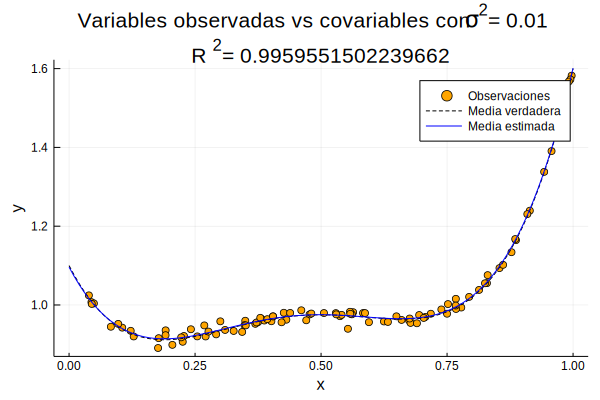

In [121]:
using LaTeXStrings # Paquete para usar latex en strings
f_ml_var0pt1(x) = β_ml_var0pt01[1] + β_ml_var0pt01[2]*x + β_ml_var0pt01[3]*x^2 + β_ml_var0pt01[4]*x^3 + β_ml_var0pt01[5]*x^4 # Media polinomial dada por máxima verosimilitud
mesh = collect(0.0:1.0/100.0:1.0)
scatter(x,y_r_var0pt01,color="orange",label="Observaciones")
plot!(mesh,f.(mesh), color = :black, linestyle=:dash ,label="Media verdadera")
plot!(mesh,f_ml_var0pt1.(mesh), color = :blue, label="Media estimada")
ylabel!("y")
xlabel!("x")
title!("Variables observadas vs covariables con \\sigma^{2}  = 0.01 \\n R^{2} = $(R²_var0pt01)")

Si los datos no tienen dependencia sobre los covariables considerados y en cambio sólo varían alrededor de cierta media, entonces SSE suele representar un porcentaje grande de SST ya que la media estimada debe aproximar la media verdaera constante en el valor del covariable. Esto queda ilustrado en la siguiente imagen. 

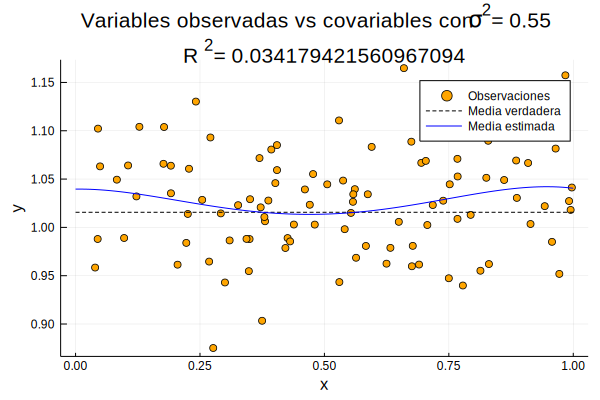

In [120]:
using LaTeXStrings # Paquete para usar latex en strings
f_no_r(x) = 0.5*(mean(y_r_var0pt1)+mean(y_r_var0pt01))
f_ml_var0pt1(x) = β_ml_no_r_var0pt055[1] + β_ml_no_r_var0pt055[2]*x + β_ml_no_r_var0pt055[3]*x^2 + β_ml_no_r_var0pt055[4]*x^3 + β_ml_no_r_var0pt055[5]*x^4 # Media polinomial dada por máxima verosimilitud
mesh = collect(0.0:1.0/100.0:1.0)
scatter(x,y_no_r_var0pt055,color="orange",label="Observaciones")
plot!(mesh,f_no_r.(mesh), color = :black, linestyle=:dash ,label="Media verdadera")
plot!(mesh,f_ml_var0pt1.(mesh), color = :blue, label="Media estimada")
ylabel!("y")
xlabel!("x")
title!("Variables observadas vs covariables con \\sigma^{2}  = 0.55 \\n R^{2} = $(R²_no_r_var0pt055)")